In [10]:
import numpy as np
import matplotlib.pyplot as plt

from qcd_likelihood import pQCD

In [13]:
mu = 2.6

for X in [1, 2, 4]:
    # I have to divide X by 2 to get numbers that agree with Table. 1 in 
    # http://arxiv.org/abs/2111.05350, because the pQCD class multiplies X by 2
    # upon initialization.
    pQCDX = pQCD(X/2)
    print(f'X = {X}:')
    print(f'n = {pQCDX.number_density(mu)} fm^-3')
    print(f'p = {pQCDX.pressure(mu)} GeV/fm^3')
    print('')

X = 1:
n = 6.1463327464130355 fm^-3
p = 2.3345795415596515 GeV/fm^3

X = 2:
n = 6.472805018284799 fm^-3
p = 3.8232745461649347 GeV/fm^3

X = 4:
n = 6.870611956625028 fm^-3
p = 4.284403308818806 GeV/fm^3



In [32]:
X_array = np.linspace(0.5, 1, 100)
n_array = np.zeros_like(X_array)
p_array = np.zeros_like(X_array)
epsilon_array = np.zeros_like(X_array)

for i, X in enumerate(X_array):
    pQCDX = pQCD(X)
    n_array[i] = pQCDX.number_density(mu)
    p_array[i] = pQCDX.pressure(mu)
    epsilon_array[i] = pQCDX.edens(mu)

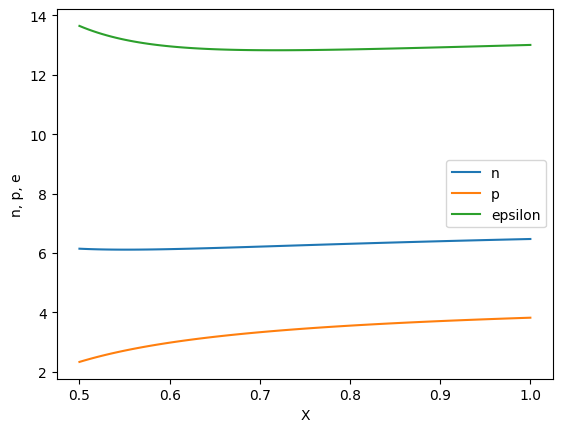

In [33]:
fig, ax = plt.subplots()

ax.plot(X_array, n_array, label='n')
ax.plot(X_array, p_array, label='p')
ax.plot(X_array, epsilon_array, label='epsilon')

ax.set_xlabel('X')
ax.set_ylabel('n, p, e')
ax.legend()